# Resources
[This Notebook](https://github.com/UKDataServiceOpen/Synthetic-Data/blob/main/code-demo/CodeDemo.ipynb)

Libraries:
* [Mockaroo](https://www.mockaroo.com/)
* [Python - Faker Documentation](https://faker.readthedocs.io/en/master/)
* [R - Synthpop Documentation](https://www.synthpop.org.uk/resources.html)
* [R - Synthpop Shiny App](https://synthpop.shinyapps.io/synthpop/)
* [Synthpop - Further Reading](https://www.synthpop.org.uk/resources.html)

Code Books:
* [Binder - Python for those without a Python environment](https://mybinder.org/v2/gh/UKDataServiceOpen/Synthetic-Data/HEAD?filepath=code-demo%2FCodeDemo.ipynb)
* [RPub - R for those without an R environment](https://rpubs.com/josephallen1994/778921)

NATSAL:
* [NATSAL](https://www.natsal.ac.uk/)
* [UKDS Open teaching dataset and data dictionaries](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8786) 
* [Codebook](http://doc.ukdataservice.ac.uk/doc/8786/mrdoc/pdf/8786_natsal_open_codebook_feb21.pdf)
* [Dataset Processing](https://github.com/UKDataServiceOpen/Synthetic-Data/blob/main/code-demo/NATSAL/NATSAL.ipynb)

# Getting started
In this section, we will cover:
* Importing the packages we need,
* Importing the data we will use,
* Checking the data in 2 different ways. 


## Importing packages
To start with we need to import any packages beyond base Python we are using.
* Numpy - Support large multi-dimension arrays.
* Pandas - Pythons data manipulation library, built on top of numpy.
* Faker - Generates fake data.
* Matplotlib - configure plots, and pandas plotting

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

!pip install Faker
from faker import Faker
import matplotlib.pyplot as plt

import os
!pip install seaborn
import seaborn as sns

## Importing data
Next we need to import the data with which we are going to work. 

In [24]:
print(os.listdir("input"))                    # a quick check on what we can import from our "inputs" folder
df= pd.read_csv('input/weight-height.csv')    # read in the .csv as a variable called "df"

['weight-height.csv']


## Checking the data
Quickly "sense check" the data we just imported. There are a few different ways to do that and I show you two here. 


In [26]:
df                                            # check the new variable by simply calling its name.

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [27]:
df.head(10)                                  # calling "data_variable.head(X)" prints the first X rows in the data_variable


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [29]:
df.head(X)                                  # Try changing the value of X. 
df.tail(X)                                  # What do you think 'tail' will do? Try it out!


# NOTE! This cell will produce an error if you try to run it as it is now. What do you need to do to make it run correctly?

NameError: name 'X' is not defined

# Exploring the data
In this section, we will cover:
* Multiple ways to get an overview, and
* How to visualise the data.

In [21]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

## Data overviews

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


First we use 'df.info' to summarise some basic qualities of our data and we can see that
* we have 1000 rows, 
* 3 columns of 2 different types (1 object and 2 floats), and
* no missing data. 

In [20]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Next, 'describe' gives mathematical information that is another overview which shows the basic descriptive statistics. 

In [30]:
df.Height.value_counts()

63.486681    1
66.299193    1
71.295195    1
67.748990    1
62.605035    1
            ..
67.156538    1
66.313844    1
67.129498    1
66.488929    1
63.612811    1
Name: Height, Length: 10000, dtype: int64

Then, 'value_counts' can be useful ways to see if we have some values that are more common than others. 


This is not very useful for the 'Height' variable. Why do you think that is? 

In [31]:
df.VARIABLE_NAME.value_counts()               # Try counting the values of other fields. Are they all unique?

# NOTE! This cell will produce an error if you try to run it as it is now. What do you need to do to make it run correctly?

AttributeError: 'DataFrame' object has no attribute 'VARIABLE_NAME'

## Visualizations

<AxesSubplot:xlabel='Height', ylabel='Weight'>

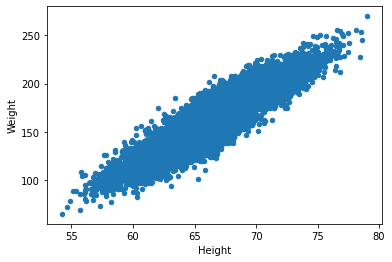

In [44]:
df.plot.scatter(x = 'Height', y = 'Weight')         # a basic scatter plot of height and weight using pandas

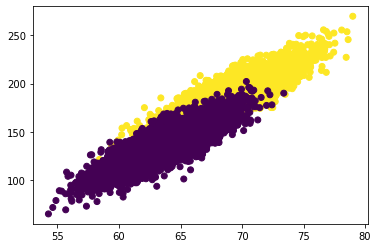

In [47]:
plt.scatter(df.Height,df.Weight, c = pd.Categorical(df.Gender).codes) # a scatter plot of height X weight using matplotlib
                                                                      # this time 

There are some problems here:
* This graph is small, probably hard to read
* Looks a bit dull
* the categories are clearly ordinal, that is 16-24 should probably be shown before 25-34 and so one
* missing titles and axis labels

We can configure matplotlib globally to resolve some of these for all future plots

In [ ]:
# List availible styles
print(plt.style.available)

In [ ]:
# have a play and choose one you like
plt.style.use('seaborn-whitegrid')

In [ ]:
# set custom parameters
plt.rcParams.update({'font.size': 22,
                    'figure.figsize':(24,8)})

In [ ]:
# .plot() assumes we want a line graph, this is not the case. We can control these plots using the kind parameter
df.age_group.value_counts(sort=False).plot(kind='bar')

In [ ]:
df['age_group'].value_counts(sort=False)

In [ ]:
# creating a categorical type


In [ ]:
# By default our plot tries to make something visually nice, sorting out bars in descending order.
from pandas.api.types import CategoricalDtype

# make a category
category_age = CategoricalDtype(
    ['16-24', '25-34', '35-44', '45-54', '55-64', '65-74'], 
    ordered=True
)

# replace our row with this category data
df['age_group'] = df['age_group'].astype(category_age)

# plot, but no longer sort descending as default
df.age_group.value_counts(sort=False).plot(kind='bar')

In [ ]:
# Add title


In [ ]:
# And finally we can add a title with the title key in our plot function.
df.age_group.value_counts(sort=False).plot(kind='bar', title="Frequency of Age groups")

So we can see we have an overepresented population of under 35s, though we do have some older respondants represented.
This could be very important to note later, poor training data in a model could mean we align closer with the more youthful oppinions on sexual attitudes.

In [ ]:
df.head()

In [ ]:
df['sex'].value_counts().plot(kind='bar', title="sex by value")

In [ ]:
df['ethnic_group'].value_counts().plot(kind='bar', title="ethnic group by value")

In [ ]:
df['sexual_identity'].value_counts().plot(kind='bar', title="sexuality by value")

In [ ]:
df['relationship_status'].value_counts().plot(kind='bar', title="relationship status by value")

In [ ]:
df['has_child'].value_counts().plot(kind='bar', title="number of respondants with children")

In [ ]:
category_opp = CategoricalDtype(
    ['Always wrong', 'Mostly wrong', 'Sometimes wrong', 'Rarely wrong', 'Not wrong at all', "Depends/Don't know"], 
    ordered=True
)

# replace our row with this category data
df['opp_one_night_stand_ok'] = df['opp_one_night_stand_ok'].astype(category_opp)

df['opp_one_night_stand_ok'].value_counts(sort=False).plot(kind='bar', title="oppinions on 'are one night stands okay?' by value")

In [ ]:
df['opp_sex_without_love_ok'].value_counts()

In [ ]:
category_agree = CategoricalDtype(
    ['Agree strongly', 'Agree', 'Neither agree or disagree', 'Disagree', 'Disagree strongly', "Don't know"], 
    ordered=True
)             

# replace our row with this category data
df['opp_sex_without_love_ok'] = df['opp_sex_without_love_ok'].astype(category_agree)

df['opp_sex_without_love_ok'].value_counts(sort=False).plot(kind='bar', title="Do you agree with the statement 'Sex without love is okay' by value")

In [ ]:
df['opp_pressure_to_have_sex'].value_counts()

In [ ]:
# replace our row with this category data
df['opp_pressure_to_have_sex'] = df['opp_pressure_to_have_sex'].astype(category_agree)

df['opp_pressure_to_have_sex'].value_counts(sort=False).plot(kind='bar', title="Do you agree with the statement 'There is pressure to have sex' by value")

In [ ]:
# replace our row with this category data
df['opp_men_have_higher_sex_drive'] = df['opp_men_have_higher_sex_drive'].astype(category_agree)

df['opp_men_have_higher_sex_drive'].value_counts(sort=False).plot(kind='bar', title="Do you agree with the statement 'Men have a higher sex drive than women?' by value")

In [ ]:
# We can also filter by sex here
df[df['sex'] == 'Male']['opp_men_have_higher_sex_drive'].value_counts(sort=False).plot(kind='bar', title="Male - Do you agree with the statement 'Men have a higher sex drive than women?' by value")

In [ ]:
# We can also filter by sex here
df[df['sex'] == 'Female']['opp_men_have_higher_sex_drive'].value_counts(sort=False).plot(kind='bar', title="Female - Do you agree with the statement 'Men have a higher sex drive than women?' by value")

In [ ]:
# replace our row with this category data
df['opp_too_much_sex_media'] = df['opp_too_much_sex_media'].astype(category_agree)

df['opp_too_much_sex_media'].value_counts(sort=False).plot(kind='bar', title="Do you agree with the statement 'There is too much sex in media' by value")

# Disclosure Control
At this point we have some quite personal looking data.
Special category data - ethnic group, sexual identity.
We are also holding directly personal data - full name is quite bad, e-mail is worse!

## Disclosure Control - Redaction
We need to do something to protect these individuals. first name, last name and email all are unneeded for our research. In any non-demo situation I would drop these columns.
Redaction - Removing data deemed too sensitive. Perhaps removing an entire row or column.

In [ ]:
# We could redact some columns using drop()
# lets make some demo columns here to redact to make this clear

df['first_name_demo'] = df['first_name']
df['last_name_demo'] = df['last_name']
df['email_demo'] = df['email']

df.head()

In [ ]:
# We could redact some columns using drop()


In [ ]:
# drop columns
df = df.drop(columns=['first_name_demo', 'last_name_demo', 'email_demo'])

df.head()

## Disclosure Control - Masking
Masking - Replacing parts of the data that are sensitive, for example replacing names with synthetic names, initials or empty strings.
This is a bit more difficult, but could be more useful. We can showcase that this data did have names, emails or more data without hiding it's existence entirely.
If we want to do something as simple as Nulling out, that's quite simple.

In [ ]:
# rebuild our demo columns
df['first_name_demo'] = df['first_name']
df['last_name_demo'] = df['last_name']
df['email_demo'] = df['email']

# print out the first 5 rows
df[['first_name_demo', 'last_name_demo', 'email_demo']].head()

In [ ]:
# we can replace all of our first names with null values


In [ ]:
# we can replace all of our first names with null values
df['first_name_demo'] = ''

# print out the first 5 rows
df[['first_name_demo', 'last_name_demo', 'email_demo']].head()

We have Nulled out our data here, but maybe we could mask them with something a bit more useful.

In [ ]:
# this time we replace values with the string FIRST_NAME, to many this is is clearly not the real data
# A researcher may want first names, but should know the data provider to ask for more details


In [ ]:
# this time we replace values with the string FIRST_NAME, to many this is is clearly not the real data
# A researcher may want first names, but should know the data provider to ask for more details
df['first_name_demo'] = 'FIRST_NAME'
df['email_demo'] = 'TEST@EMAIL.COM'

# print out the first 5 rows
df[['first_name_demo', 'last_name_demo', 'email_demo']].head()

We could also shuffle these values around, while this will use the personal last_names, it can be effective.

In [ ]:
# sample the entire last_name dataset


In [ ]:
# sample the entire last_name dataset
df['last_name_demo'] = df['last_name_demo'].sample(frac=1).values

# print out the first 5 rows
df[['first_name_demo', 'last_name_demo', 'email_demo']].head()

## Disclosure Control - Coarsening
We could also apply some coarsening here, while traditionally we would apply this to geographic or mathematical data with obvious rounding applications, we can apply it here to our last names.

Pandas allows us to write custom functions for custom masking. For example, we could. The apply function is very useful for applying things like this.

In [ ]:
# Coarsen to first character


In [ ]:
# reset our demo columns
df['first_name_demo'] = df['first_name']
df['last_name_demo'] = df['last_name']
df['email_demo'] = df['email']

# return the first character as a function
def get_initial(string):
    return string[0]

# we can then use apply
df['first_name_demo'] = df['first_name_demo'].apply(get_initial)

df[['first_name','first_name_demo', 'last_name_demo']].head()

In [ ]:
# Coarsen using a lambda function


In [ ]:
# We can also use a shorthand lambda function
df['last_name_demo'] = df['last_name_demo'].apply(lambda string: string[0])

df[['first_name','first_name_demo', 'last_name', 'last_name_demo']].head()

## Disclosure Control - Mimicking
We could instead make use of a data generation library such as Mockaroo or Faker. For now lets drop these demo columns, restoring us to our previously cleaned dataset.

As mentioned in the webinars, the amount to which you should be reducing this data is entirely dependent on the dataset, your research question and the individual who approves you ethical use of data. There is no perfect solution here. 
For your own sake document the methods by which you are processing, synthetic or not.

In [ ]:
df = df.drop(columns=['first_name_demo', 'last_name_demo', 'email_demo'])

df.head()

# Mockaroo
Next we will introduce [Mockaroo](https://www.mockaroo.com/) for substitution.

## Task 1 - First name, last name, email and gender
* We can add and remove further columns, add gender
* we can re-order if needed

note: e-mail is connected with first name and last name.
lost e-mail provider, an excellent feature in fraud detection.
Names don't correlate here with age or gender.
showcase gendered names.

## Task 2 - E-mails are missing 2% of the time
* We can set a missing percentage, for example e-mail was missing 2%. Some people don't have e-mail addresses such as young children, or the elderly!

## Task 3 - Maths
* create a column - weight
* find a mathematical dsitribution - normal with a mean of 55 and std of 5.

## Task 4 - Height
* create a height column
* use built-in scripting to mimick height - field('weight'
* use built-in scripting to sum two columns -  field('weight') + this
* add some noise - field('weight') + this + 50 or + random(40, 60)

## Task 5 - Tidy up
* Really we don't need a lot of this though, so let's remove gender, weight and height.
* We can preview the first 100 rows, and download our data
* How many rows do we need?



In [ ]:
df.info()

* so let's generate 3799
* Uh oh... this is where Mockaroo makes their money and is now a limitation of the technology
* We can get around this by generating multiple datasets and merging them.
* If you are using the binder link you won't be able to add your new datasets so I have provided some already, split by gender under:
    * NATSAL/mockaroo.csv
    * NATSAL/male.csv
    * NATSAL/male_2.csv
    * NATSAL/female.csv
    * NATSAL/female_2.csv
    * NATSAL/female_3.csv

In [ ]:
mockaroo = pd.read_csv('NATSAL/mockaroo.csv')
mockaroo.head()

In [ ]:
# join these datasets with no logic, called concatenate


In [ ]:
# Join this with our dataset
result = pd.concat([mockaroo, df], axis=1, join="inner")
result.head()

In [ ]:
# call the head function


In [ ]:
df.head()

We may see some conflicts, these names arguably conflict with sex, or in more nuanced ways age and ethnicity. How can we correlate with names?

To start with, let's correlate only with Male or Female.
We need to generate multiple datasets for male and female data in mockaroo here.
We can split the dataset, and merge in these new names. This is simple enough to do with only Male and Female. We split into two datasets, merge in our anonymised data, merge those datasets back together and resample.

In [ ]:
# count sex


In [ ]:
# count sex
df['sex'].value_counts()

In [ ]:
# drop original names and email


In [ ]:
# We can split our dataframe into male and female only, and generate datasets in Mockaroo for each of these


In [ ]:
# drop original names and email
df = df.drop(columns=['first_name', 'last_name', 'email'])

# We can split our dataframe into male and female only, and generate datasets in Mockaroo for each of these
male_df = df[df['sex'] == 'Male']
female_df = df[df['sex'] == 'Female']

In [ ]:
# import datasets
male_personal_df_1 = pd.read_csv('NATSAL/male.csv')
male_personal_df_2 = pd.read_csv('NATSAL/male_2.csv')

# concat 1000 rows from Mockaroo
male_personal_df = pd.concat([male_personal_df_1,male_personal_df_2])

# match the size of our dataset
male_personal_df = male_personal_df[0:1534]

# reset indexes so we can concatenate without problems
male_personal_df.reset_index(drop=True, inplace=True)
male_df.reset_index(drop=True, inplace=True)

# merge datasets
male_df = pd.concat([male_personal_df, male_df], axis=1,  ignore_index=False)
male_df.head()

In [ ]:
# do the same with female
# import datasets
female_personal_df_1 = pd.read_csv('NATSAL/female.csv')
female_personal_df_2 = pd.read_csv('NATSAL/female_2.csv')
female_personal_df_3 = pd.read_csv('NATSAL/female_3.csv')

# concat 1000 rows from Mockaroo
female_personal_df = pd.concat([female_personal_df_1, female_personal_df_2, female_personal_df_3])

# match the size of our dataset
female_personal_df = female_personal_df[0:2265]

# reset indexes so we can concatenate without problems
female_personal_df.reset_index(drop=True, inplace=True)
female_df.reset_index(drop=True, inplace=True)

# merge datasets
female_df = pd.concat([female_personal_df, female_df], axis=1,  ignore_index=False)
female_df.head()

In [ ]:
# Finally we need to merge all that data back together


# shuffle so our data isn't split into male and female halves, a shortcut here is to sample all of our rows, and make use of 1, or 100% of the rows

# reindex

# head



In [ ]:
# Finally we need to merge all that data back together
personal_df = pd.concat([female_df, male_df])

# shuffle so our data isn't split into male and female halves, a shortcut here is to sample all of our rows, and make use of 1, or 100% of the rows
personal_df = personal_df.sample(frac=1)

# reindex
personal_df.reset_index(drop=True, inplace=True)

personal_df.head()

In [ ]:
# drop demos if still here
# personal_df = personal_df.drop(columns=['first_name_demo', 'last_name_demo', 'email_demo'])

# rename synthetic columns
personal_df.columns = ['synth_first_name', 'synth_last_name', 'synth_email','age_group', 'sex', 'ethnic_group', 'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok', 'opp_pressure_to_have_sex','opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']

personal_df.head()

This gives us a very nice first pass, and lets us get some quite complicated simulation done. I would suggest if you feel technically capable of this, try to reproduce what you are doing ina  programming language of your choice, this system is only a fraction of what you really have the power to do in a language like Python.

What we've seen here is that although we have masked the names and emails, we have a problem. these new e-mails look slightly off for now.

Simply by correlating names with gender, we've had to generate 5 datasets, merge them together and we've split our entire dataset into 2. If we do this with sex and ethnic group we have 4 different datasets. 

including age groups there are now 24 different datasets. That is only to correlate with our one name variable, really we need to correlate between all variables!

What if we had 1,000,000 rows?
Do you want to sit there generating 1000 datasets?
Do you want to deal with all those merge changes? I know I don't!
the complexity of this generation compounds. What we are effectively doing here is creating a very basic version of a decision tree.

Let's make use of Faker to churn this out a bit more.

# Faker
Next up we are looking at [Faker](https://faker.readthedocs.io/en/master/).
Faker is a Python package that generates fake data for you.

In binder you should already have access to this package,

In [ ]:
# initialise Faker

# call the name function


In [ ]:
# first we initialise a faker object
fake = Faker()

# here we can call Fakers various providers, and we can rerun
fake.name()

In [ ]:
# call the addresses function


In [ ]:
# even fake addresses
fake.address()

In [ ]:
# generate 10 names in a for loop


In [ ]:
# we can generate as many names as we need.
for _ in range(10):
  print(fake.name())

Faker has some built-in providers listed [here](https://faker.readthedocs.io/en/stable/providers.html)

In [ ]:
# barcodes
print(fake.ean())

# free emails like hotmail, gmail etc
print(fake.ascii_free_email())

# full credit card details
print(fake.credit_card_full())

Beyond this, Faker also has community providers, meaning anybody can write anything we need. There exists seperate packages to generate mark down blog posts, air travel, credit card scores and more.
[Community Providers](https://faker.readthedocs.io/en/stable/communityproviders.html)

In [ ]:
# import additional providers, we need emails


In [ ]:
# import additional providers, we need emails
from faker.providers import internet

fake = Faker()
fake.add_provider(internet)

print(fake.ipv4_private())

A perk over mockaroo is that we can make use of different locales, meaning we can generate individuals from other locations.

In [ ]:
# Change Locales



In [ ]:
# we can generate some italian names for example
fake = Faker('it_IT')
for _ in range(10):
    print(fake.name())
    print(fake.address())

In [ ]:
# Change to multiple locales


In [ ]:
# Or event a generate a combination of different locales. re running generates new names
fake = Faker(['it_IT', 'en_US', 'ja_JP'])
for _ in range(10):
    print(fake.name())

In [ ]:
# Make it reproducible with a seed



In [ ]:
# we can also seed our generation for consistent results, re running keeps our results identical.
# If you need to prove you generated these names, here is how you do it.

fake = Faker('en_UK')
Faker.seed(4321)
for _ in range(10):
    print(fake.name())

Emails are built into faker so we can use those directly, what happens when we generate the users we need for the NATSAL data


In [ ]:
fake = Faker(['it_IT', 'en_US', 'ja_JP'])
# Generating all three, one at a time creates three seperate individuals.
print(fake.first_name_female())
print(fake.last_name())
print(fake.ascii_free_email())

In [ ]:
# Write a custom provider to change based on White or not white, male or female



In [ ]:
# To generate all three together, we can make our own provider.
# first, import a similar Provider or use the default one
from faker.providers import BaseProvider
fake = Faker('en_UK')

# create new provider class. really we can do anything Python lets us here.
class MyProvider(BaseProvider):
    def individual(self, sex, ethnic_group):
        
        # This is a HUGE oversimplification of the complciated relationship between names, sex and race.         
        # conditional decisions now possible, we can split male and female generation
        if ethnic_group == "White":
            fake = Faker('en_UK')
        else:
            fake = Faker('es_ES')
        
        if sex == "Male":
            first_name = fake.first_name_male()
        else:
            first_name = fake.first_name_female()

        
        last_name = fake.last_name()
        
        # We make a big assumption here, that all emails are a first name first character, prepended to a last name
        email = first_name[0] + last_name + '@' + fake.free_email_domain()
        
        
        return {'first_name': first_name,
                'last_name': last_name,
                'email': email,
               }

fake.add_provider(MyProvider)

# Generate a male
fake.individual('Male', 'White')

In [ ]:
fake.individual('Male', 'Not white')

In [ ]:
# generate a Female
fake.individual('Female', 'White')

In [ ]:
fake.individual('Female', 'Not white')

Now we can return back to our original dataset, we have almost 4000 users that all need new names and emails generated. This is a very simple case, if we had millions of rows, and much more complicated individuals we can go a lot deeper and Faker over Mockaroo is the tool to do this.

First let's deal with those synthetic e-mails, something isn't quite right there.

In [ ]:
personal_df.head()

In [ ]:
# Create our new columns
df['synth_first_name'] = 'FIRST_NAME'
df['synth_last_name'] = 'LAST_NAME'
df['synth_email'] = 'TEST@EMAIL.com'

# rearrange columns
df = df[['synth_first_name', 'synth_last_name', 'synth_email', 'age_group', 'sex', 'ethnic_group', 'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok', 'opp_pressure_to_have_sex','opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']]

df.head()

In [ ]:
# When we applied the apply function before we could only use one variable at a time, but apply is more powerful than this
df['age_group'].apply(lambda age: age)

In [ ]:
# write a function and apply it to the entire row



In [ ]:
# 200 seconds to run, 5 per 100 rows
# we can instead use apply on the entire row, I won't use lambda here for readability
def generate_individual(row):
    individual = fake.individual(row['sex'], row['ethnic_group'])

    row['synth_first_name'] = individual['first_name']
    row['synth_last_name'] = individual['last_name']
    row['synth_email'] = individual['email']

    return row
    
# note axis = 1, as in apply to rows not columns
# For the sake of speed I am only running this on the first 500 rows
df[:50] = df[:50].apply(generate_individual, axis=1)

df.head(20)

# Faker - Use case
Look across these rows, does anything not make sense? first names correlate with gender, and ethnic group.
Emails are comprised of first names and last names, though the variety is quite poor.

What we are finding here is that as we anonymise in more detail, the complexity of this generation compounds. 
What we are effectively doing here is creating a very basic version of a decision tree.

# Decision Tree
[Source](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-understanding-decision-trees-adb2165ccab7)

A decision tree is very similar to the flowcharts we are used to seeing, for example,
![image.png](https://miro.medium.com/max/531/1*rmV_02XSjCpCaj11wZJDCQ.png)











In the real world we might summarise a lot of decisions we make as boiling down to one or two factors. 
We might say we drive to work when the weather is bad, but really it could be a lot more complicated than that.

Or is it more complicated than that?:
* Do we have a job?
* Is the weather nice?
* Is the public transport good?
* Is it affordable?
* Do I have a car?
* Is the car working?

All these factors are important to our decision, though some are more important than others. 
1 day in a year of data our road might be blocked by a fallen tree.

We can build a tree that can deal with even these edge cases, but often these trees are huge, complicated, hard to understand and general what we call "overfit" in Machine learning. Where our model works very well on our training data, but not in the real situation.

these trees can get a bit more complicated,case we can have more complicated decisions like this. When trained with a Machine Learning alogirhtm we start to get very specific and strange numbers.

![image.png](https://miro.medium.com/max/781/1*fGX0_gacojVa6-njlCrWZw.png)


While we could train a decision tree on our data, this won't do much to protect our individuals, an overfit decision tree might just learn to churn out the same individual every time. We could add noise and go through general disclosure control. Or we could use a data synthesis package and not worry about this.

Our tree might learn to predict names with frequency, and when there is personal data on the mix this won't work well.

Decision tree algorithms are how Synthpop works, among some other tools.


# Synthpop
While we could train a decision tree on our data, this won't do much to protect our individuals, an overfit decision tree might just learn to churn out the same individual every time. We could add noise and go through general disclosure control. Or we could use a data synthesis package and not worry about this.

[R - Synthpop Shiny App](https://synthpop.shinyapps.io/synthpop/)


Faker, Synthpop and Mockaroo feature comparison. from ONS
https://www.ons.gov.uk/methodology/methodologicalpublications/generalmethodology/onsworkingpaperseries/onsmethodologyworkingpaperseriesnumber16syntheticdatapilot

## R Setup
To setup R we need to set our working directory

We need to at least import the two libraries we need
* readr - to read in our dataset
* synthpop - to synthesize our data

Alternatively you can follow along in our [RPubs](https://rpubs.com/josephallen1994/778921)

In [ ]:
# R Launch Details
# setwd("~/GitHub/Synthetic-Data/code-demo")

# import library
# library(readr)
# library(synthpop)

In [ ]:
# R - Next we read in our data
# df <- read_csv("NATSAL/natsal_3_teaching_open_with_personal.csv")

Synthpop documentation suggests not trying to synthesize more than around 12 variables.
## Synthpop Best Practices
* Around 12 variables maximum - we have 14, 11 are factors.
* Do not train on less than 500 rows - we have 3799
* run codebook.syn()



In [ ]:
# R
# codebook.syn(df)

### Synthpop codebook
* nmiss is missing values
* perctmiss - percentage missing
* ndisctinct, the number of distinct values.

Now our personal data is almost always unique, this means a decision tree might try to use it to say "If a user is named Carlos, they must hast be for one night stands, think sex without love is okay, be 25 years old" and so on. this is what we call overfitting, our tree could end up with thousands of nodes representing this granularity and would be quite useless applied elsewhere. Which leads us to our next best practice.

## Synthpop Best Practices
* Remove any identifying data

In fact, if we try to skip these steps and go straight to synthesis we get a helpful error.
`Error: Factor(s) with more than 60 levels: first_name (3026), last_name (3659), email (3704)`

we can bypass this if we want, but I think it's valid, let's drop these columns.



In [ ]:
# Drop identifying columns
# drops <- c("first_name","last_name","email", 'importance_religion', 'age_at_first_child')
# df <- df[ , !(names(df) %in% drops)]

# Logical also need to be converted to factors
# df$has_child <- as.factor(df$has_child)

## Synthpop Best Practices
* Change character text into factors

We can convert all character columns to factors with this one line.
`df <- as.data.frame(unclass(df), stringsAsFactors = TRUE)`



## Synthpop Best Practices
* beware non R missing value NA, for example nulls, False and other "missing" values. It looks like we are fine here as we saw missing valuessyn_df
* Remove any variables that could be dervies from others.
* Set any rules, children shouldn't have a job etc. You can set the rules with the parameters rules  and rvalues of the syn() function. The syn() function will warn you if the rule is not obeyed in the observed data.

So at this stage let's give synthesis a go!

In [ ]:
# R Synthesis, synthesize 1 dataset1
# syn_df <- syn(df)

# R Synthesis, synthesize 5 datasets
# syn_df <- syn(df, m = 5)

# Summarise
#  summary(syn_df)
    
# We can then compare these, with multiple datasets
# compare(syn_df, df) 

# compare a single variable
# compare(syn_df, df, vars = "age_group")

# or compare a single variable, across all synthesized datasets.
# compare(syn_df, df, vars = "age_group", msel = 1:5)
# compare(syn_df, df, vars = "sex", msel = 1:5)
# compare(syn_df, df, vars = "ethnic_group", msel = 1:5)
# compare(syn_df, df, vars = "sexual_identity", msel = 1:5)
# compare(syn_df, df, vars = "relationship_status", msel = 1:5)
# compare(syn_df, df, vars = "has_child", msel = 1:5)
# compare(syn_df, df, vars = "opp_one_night_stand_ok", msel = 1:5)
# compare(syn_df, df, vars = "opp_sex_without_love_ok", msel = 1:5)
# compare(syn_df, df, vars = "opp_pressure_to_have_sex", msel = 1:5)
# compare(syn_df, df, vars = "opp_men_have_higher_sex_drive", msel = 1:5)
# compare(syn_df, df, vars = "opp_too_much_sex_media", msel = 1:5)

# of course it's not enough simply to match the counts, we need to see if things correlate
# Let's write this data out so we can read it in here.
# write.syn(syn_df,"syn_NATSAL", filetype = "csv", convert.factors = "numeric")

For now let's read in this dataset into Python and see if we can compare these further.

In [ ]:
# Let's read in this dataset
syn_df = pd.read_csv('syn_NATSAL.csv')
syn_df.head()

In [ ]:
syn_df.info()

The only thing that looks a little off here is our has_child, which has been converted from a boolean True or False to numeric labels.

let's resolve this quickly.

In [ ]:
syn_df['has_child'] = syn_df['has_child'].replace(1,False)
syn_df['has_child'] = syn_df['has_child'].replace(2,True)

syn_df.head(10)

Next we need our first names, last names and emails. Again I am only going to do this for a few rows for the demo

In [ ]:
# Create our new columns
syn_df['synth_first_name'] = 'FIRST_NAME'
syn_df['synth_last_name'] = 'LAST_NAME'
syn_df['synth_email'] = 'TEST@EMAIL.com'

# rearrange columns
syn_df = syn_df[['synth_first_name', 'synth_last_name', 'synth_email', 'age_group', 'sex', 'ethnic_group', 'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok', 'opp_pressure_to_have_sex','opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']]

syn_df.head()

In [ ]:
syn_df[:50] = syn_df[:50].apply(generate_individual, axis=1)

syn_df.head(10)

Finally let's do some comparison between this and our real data, for this perhaps some notion of correlation for factoral data makes sense.

In [ ]:
df['opp_one_night_stand_ok'].hist(alpha=1)
syn_df['opp_one_night_stand_ok'].hist(alpha=0.5)

In [ ]:
corr = df.apply(lambda x : pd.factorize(x)[0]).corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
syn_corr = syn_df.apply(lambda x : pd.factorize(x)[0]).corr()
syn_corr.style.background_gradient(cmap='coolwarm')

## Synthpop - summary
We can see here that our first names correlate largely with our last names and email. This isn't suprising as we never generated a full dataset so they are still mostly "FIRST_NAME", "LAST_NAME" and "TEST@EMAIL.COM".
All variables correlate with themselves.

The strongest correlations are between age, relationship status, child status.
There also seems to be some relationship between ethnic group and sexual_identity.
It also seems that one gender seems to be more likely to have a child than another.

Some of these correlations have remained close such as the relationship between age_group and having a child.
child and relationship status have changed quite a lot, dropping from a tight correlation of 0.4 down to 0.26

What we do have at the end of this process though, is a colelction of connected oppinion data, with disclosure control used to make our data look the same as the original. Analysis could be applied to our synthetic data to test our methods while we wait for approved access to the original data. 

In this case the starting data was also synthetic, but now that we can test our methods without needing the personal data we could even hand over a notebook like this to the data provider, and hope they will apply the data themselves.

## Synthpop - Next steps
outside of this demo check out these [advanced resources](https://www.synthpop.org.uk/resources.html)

Now you have managed your first synthesis you could read our paper in the Journal of Statistical Software and explore other resources on our website with more explanation of different features of synthpop including:
* statistical disclosure control functions,
* customising your synthesis by defining methods, order and predictor matrix,
* evaluating the utility of the synthetic data,
* comparing model fits between observed and synthetic data.

# Conclusion
To conclude:
- Exploratory data analysis is needed to understand dataset context.
- From here Mockaroo can do the job of basic masking.
- If a dataset is too large we can write a custom Faker provider.
- Synthpop is quite easy to use, but has very deep and academic style tutorials.

Any questions?